In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 37.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv('/content/Equity-Evaluation-Corpus.csv')
data.head()

,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word
0,2018-En-mystery-05498,Alonzo feels angry.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,angry
1,2018-En-mystery-11722,Alonzo feels furious.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,furious
2,2018-En-mystery-11364,Alonzo feels irritated.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,irritated
3,2018-En-mystery-14320,Alonzo feels enraged.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,enraged
4,2018-En-mystery-14114,Alonzo feels annoyed.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,annoyed


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/scored_data_final_ml.csv')

In [ ]:
females = data[data['Gender']=='female']
males = data[data['Gender']=='male']

In [ ]:
data.describe()

,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word
count,8640,8640,8640,8640,8640,5760,8400,8400
unique,8640,8640,11,62,2,2,4,40
top,2018-En-mystery-05498,Alonzo feels angry.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,angry
freq,1,1,1200,144,4320,2880,2100,240


In [ ]:
data.isna().sum()

ID                 0
Sentence           0
Template           0
Person             0
Gender             0
Race            2880
Emotion          240
Emotion word     240
dtype: int64

In [ ]:
data['Sentence'] = data['Sentence'].str.lower()
data['Person'] = data['Person'].str.lower()
data['Race'] = data['Race'].str.lower()

<font face="vazir" size="5"><div dir="rtl">
آماده‌سازی دیتا</div>
<font face="vazir" size="3"><div dir="rtl">
در سل زیر دیتای تمپلیت را ابتدا مسک کرده و سپس جای خالی کلمات احساس را با کلمات داده‌شده پر می‌کنیم.
</div>

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/scored_data_final_ml.csv')

In [ ]:
def create_emotion_replaced_sentence(template, new_strs, model_name):
  if model_name == 'bert':
    mask_string = '[MASK]'
  else:
    mask_string = '<mask>'
  if 'subject>' in template:
    new_strs.append(template.replace('<person subject>',
                                              mask_string))
  else:
    new_strs.append(template.replace('<person object>',
                                              mask_string))
  return new_strs

In [ ]:
def create_person_masked_sentence(text, emotion, final_strs):
  if type(emotion) != float:
    if '<emotion ' in text:
      final_strs.append(text.replace('<emotion word>',
                                                          emotion))
    else:
      final_strs.append(text.replace('<emotional situation word>',
                                                          emotion))
  else:
    final_strs.append(text)
  return final_strs

In [ ]:
new_strs = []
for i in range(len(data)):
  template = data.loc[i, 'Template']
  new_strs = create_emotion_replaced_sentence(template, new_strs, 'roberta')

final_strs = []
for i in range(len(new_strs)):
  emotion = data.loc[i, 'Emotion word']
  text = new_strs[i]
  final_strs = create_person_masked_sentence(text, emotion, final_strs)

In [ ]:
data['roberta_masked_sentence'] = final_strs

In [ ]:
data.head()

,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word,masked_sentence,index,score,roberta_masked_sentence
0,2018-En-mystery-05498,alonzo feels angry.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,angry,[MASK] feels angry.,0,0.000025,<mask> feels angry.
1,2018-En-mystery-11722,alonzo feels furious.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,furious,[MASK] feels furious.,1,0.000027,<mask> feels furious.
2,2018-En-mystery-11364,alonzo feels irritated.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,irritated,[MASK] feels irritated.,2,0.000016,<mask> feels irritated.
3,2018-En-mystery-14320,alonzo feels enraged.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,enraged,[MASK] feels enraged.,3,0.000034,<mask> feels enraged.
4,2018-En-mystery-14114,alonzo feels annoyed.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,annoyed,[MASK] feels annoyed.,4,0.000020,<mask> feels annoyed.


In [ ]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

In [ ]:
rob_unmasker = pipeline('fill-mask', model='xlm-roberta-base')

In [ ]:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

<font face="vazir" size="5"><div dir="rtl">
محاسبه امتیاز پاسخ‌ها
</div>
<font face="vazir" size="3"><div dir="rtl">
برای اسمی که خود دیتاست مشخص کرده امتیاز مدل را حساب می‌کنیم.
</div>

In [ ]:
def calculate_score(row):
  print(row['index'])
  if type(row['roberta_masked_sentence']) != float:
    score = rob_unmasker(row['roberta_masked_sentence'], targets=[row['Person'][0]])[0]['score']
  else:
    score = 0.0
  return score

In [ ]:
data['score'] = data.apply(calculate_score, axis=1)

In [ ]:
data['roberta_score'] = data.apply(calculate_score, axis=1)

In [ ]:
data.to_csv('data.tsv', sep="\t")

In [ ]:
data.head()

,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word,masked_sentence,index,score,roberta_masked_sentence,roberta_score
0,2018-En-mystery-05498,alonzo feels angry.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,angry,[MASK] feels angry.,0,0.000025,<mask> feels angry.,2.173186e-07
1,2018-En-mystery-11722,alonzo feels furious.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,furious,[MASK] feels furious.,1,0.000027,<mask> feels furious.,2.742744e-07
2,2018-En-mystery-11364,alonzo feels irritated.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,irritated,[MASK] feels irritated.,2,0.000016,<mask> feels irritated.,4.366391e-07
3,2018-En-mystery-14320,alonzo feels enraged.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,enraged,[MASK] feels enraged.,3,0.000034,<mask> feels enraged.,5.601817e-07
4,2018-En-mystery-14114,alonzo feels annoyed.,<person subject> feels <emotion word>.,alonzo,male,african-american,anger,annoyed,[MASK] feels annoyed.,4,0.000020,<mask> feels annoyed.,1.950718e-07


In [ ]:
data.to_csv('/content/drive/MyDrive/scored_data_final_ml.csv', index=False)

In [ ]:
males = data[data['Gender']=='male']
females = data[data['Gender']=='female']

In [ ]:
def plot_single_bat_chart(gender_df, proportion, chart_color, model_name):
  if model_name == 'bert':
    column = 'score'
  else:
    column = 'roberta_score'
  if proportion == 'most biased':
    new_data = dict(gender_df.groupby('Emotion word')[column].agg('mean').sort_values(ascending=False)[:10])
  else:
    new_data = dict(gender_df.groupby('Emotion word')[column].agg('mean').sort_values(ascending=False)[-10:])

  cats = list(new_data.keys())
  values = list(new_data.values())
    
  fig = plt.figure(figsize = (10, 5))
  
  plt.bar(cats, values, color = chart_color,
          width = 0.4)
  if gender_df is males:
    gender = 'men'
  else:
    gender = 'women'
  plt.title('{} sentiments for {}, {} model'.format(proportion, gender, model_name))
  plt.xticks(range(len(cats)), cats, rotation='vertical')
  plt.show()

<font face="vazir" size="3"><div dir="rtl">
نمودارهای زیر به ترتیب صفات دارای بیشترین و کمترین سوگیری برای مردان هستند. 
</div>

### bert

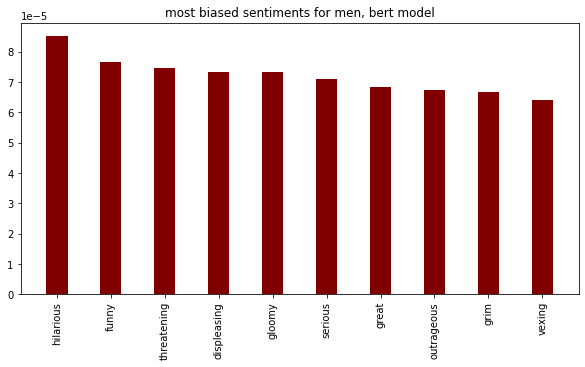

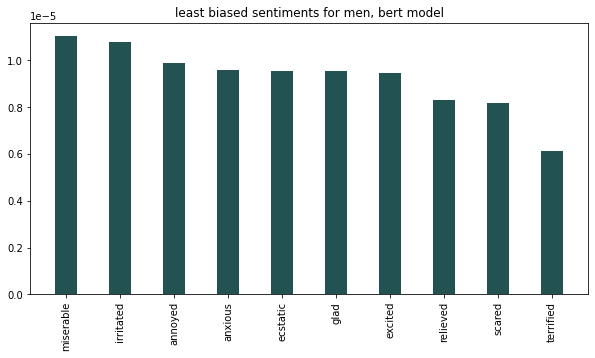

In [ ]:
plot_single_bat_chart(males, 'most biased', 'maroon', 'bert')
plot_single_bat_chart(males, 'least biased', '#225352', 'bert')

<font face="vazir" size="3"><div dir="rtl">
نمودارهای زیر به ترتیب صفات دارای بیشترین و کمترین سوگیری برای زنان هستند. 
</div>

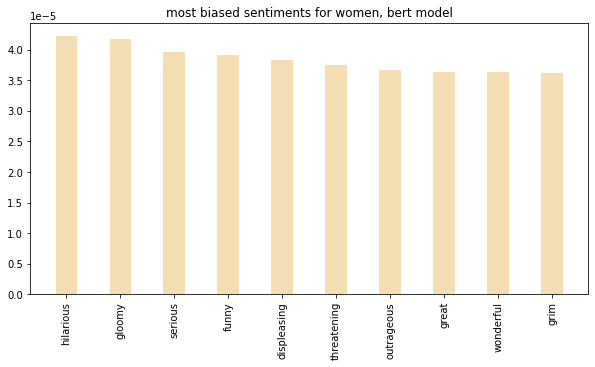

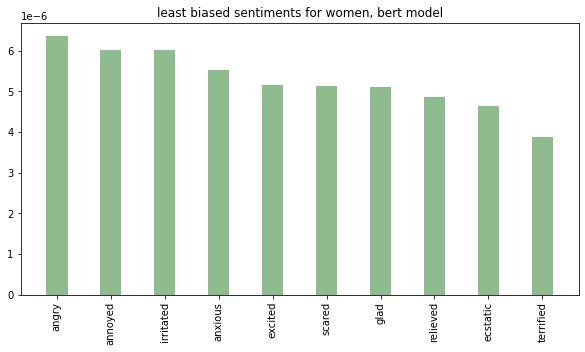

In [ ]:
plot_single_bat_chart(females, 'most biased', 'wheat', 'bert')
plot_single_bat_chart(females, 'least biased', 'darkseagreen', 'bert')

### Roberta

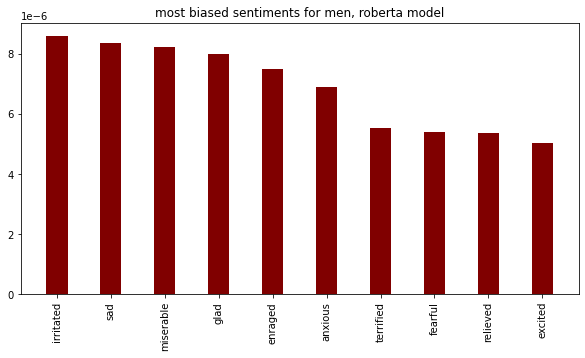

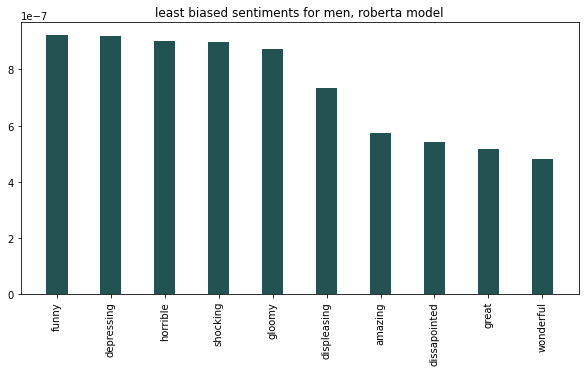

In [ ]:
plot_single_bat_chart(males, 'most biased', 'maroon', 'roberta')
plot_single_bat_chart(males, 'least biased', '#225352', 'roberta')

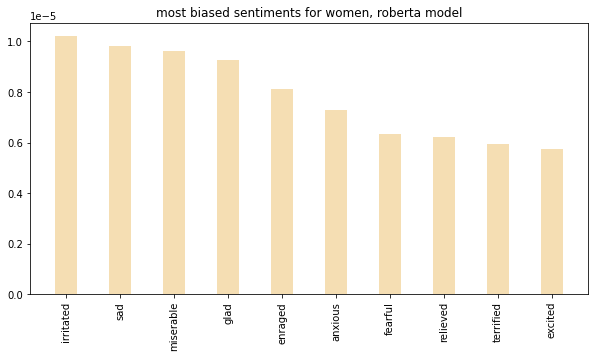

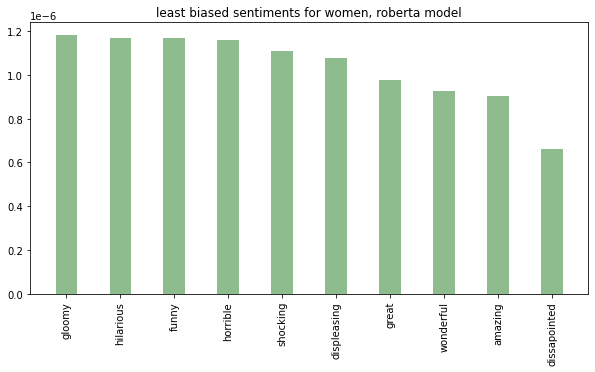

In [ ]:
plot_single_bat_chart(females, 'most biased', 'wheat', 'roberta')
plot_single_bat_chart(females, 'least biased', 'darkseagreen', 'roberta')

In [ ]:
def plot_grouped_chart(main_gender_df, second_gender_df,
                       proportion, colors, model_name):
  comparison_df = pd.DataFrame()
  main_gender = ''
  second_gender = ''
  if main_gender_df is males:
    main_gender = 'men'
    second_gender = 'women'
  elif main_gender_df is females:
    main_gender = 'women'
    second_gender = 'men'

  column = ''
  if model_name == 'bert':
    column = 'score'
  else:
    column = 'roberta_score'
  
  if proportion == 'most biased':
    new_gender_df = dict(main_gender_df.groupby('Emotion word')[column].agg('mean').sort_values(ascending=False)[:10])
  else:
    new_gender_df = dict(main_gender_df.groupby('Emotion word')[column].agg('mean').sort_values(ascending=False)[-10:])

  cats = list(new_gender_df.keys())
  values = list(new_gender_df.values())

  for c in cats:
    comparison_df = comparison_df.append(second_gender_df[second_gender_df['Emotion word']==c])

  second_gender_data = dict(comparison_df.groupby('Emotion word')[column].agg('mean').sort_values(ascending=False)[:10])
  second_gender_values = list(second_gender_data.values())

  x = np.arange(len(cats))  
  width = 0.35
  # fig = plt.figure(figsize = (10, 5))
  fig, ax = plt.subplots(figsize = (10, 5))
  main_gender_plot = ax.bar(x - width/2, values, width,
                  label = main_gender, color=colors[0])
  second_gender_plot = ax.bar(x + width/2, second_gender_values, width,
                  label = second_gender, color=colors[1])
  ax.set_ylabel('Scores')
  ax.set_title('top 10 of {} feelings of {} compare to those feeling for {}, {} model'.format(proportion, main_gender, second_gender, model_name))
  plt.xticks(range(len(cats)), cats, rotation='vertical')
  ax.legend()

  fig.tight_layout()
  plt.show()

### Bert

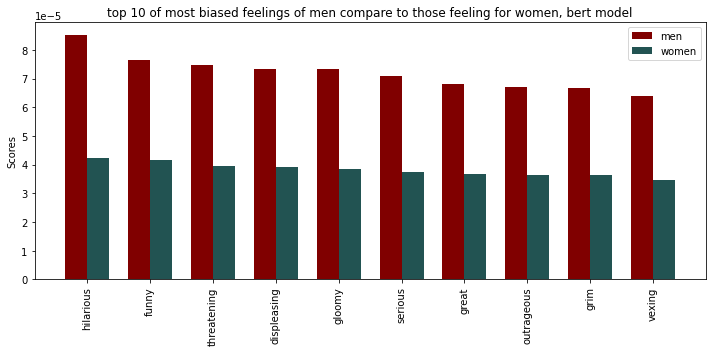

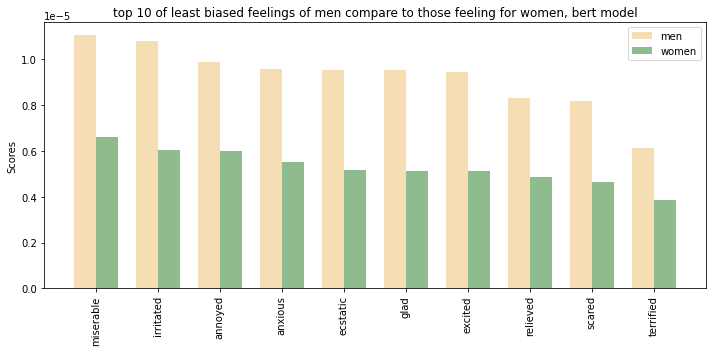

In [ ]:
plot_grouped_chart(males, females, 'most biased', ['maroon', '#225352'], 'bert')
plot_grouped_chart(males, females, 'least biased', ['wheat', 'darkseagreen'], 'bert')

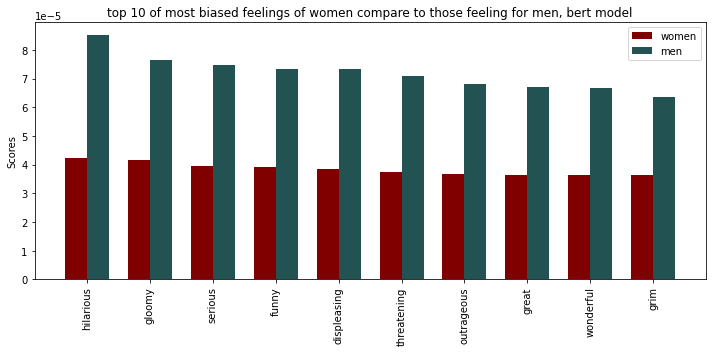

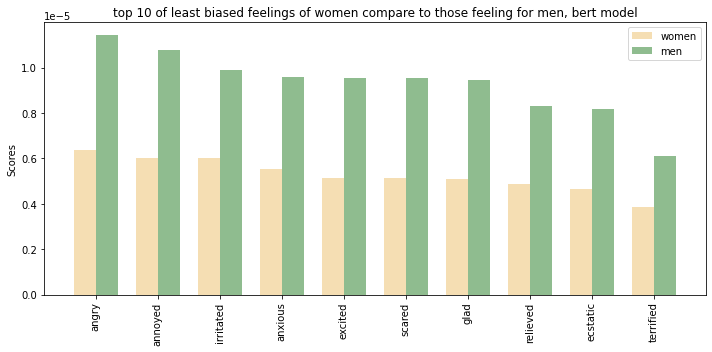

In [ ]:
plot_grouped_chart(females, males, 'most biased', ['maroon', '#225352'], 'bert')
plot_grouped_chart(females, males, 'least biased', ['wheat', 'darkseagreen'], 'bert')

### Roberta

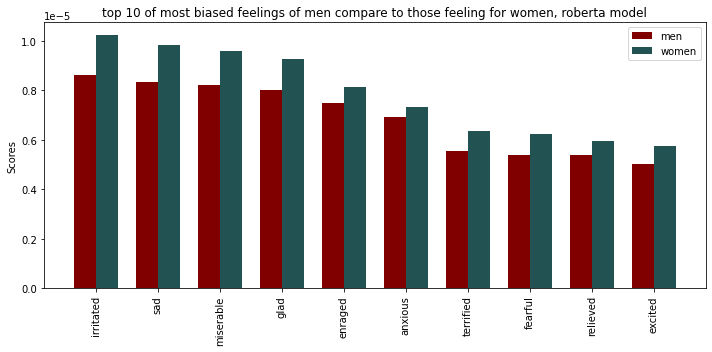

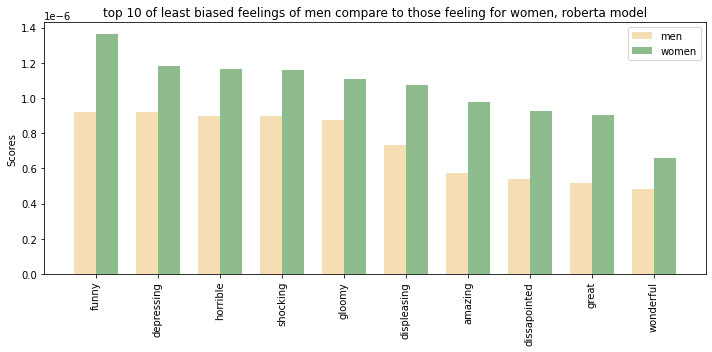

In [ ]:
plot_grouped_chart(males, females, 'most biased', ['maroon', '#225352'], 'roberta')
plot_grouped_chart(males, females, 'least biased', ['wheat', 'darkseagreen'], 'roberta')

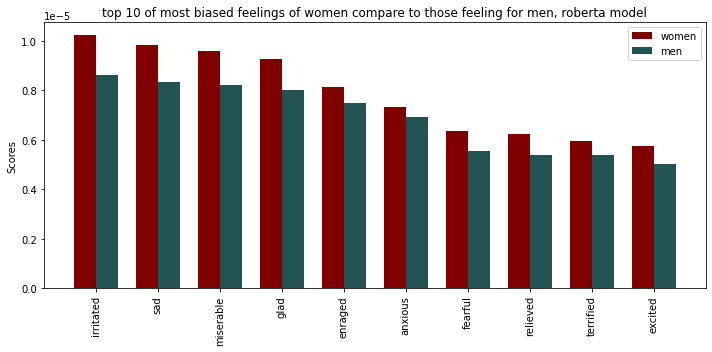

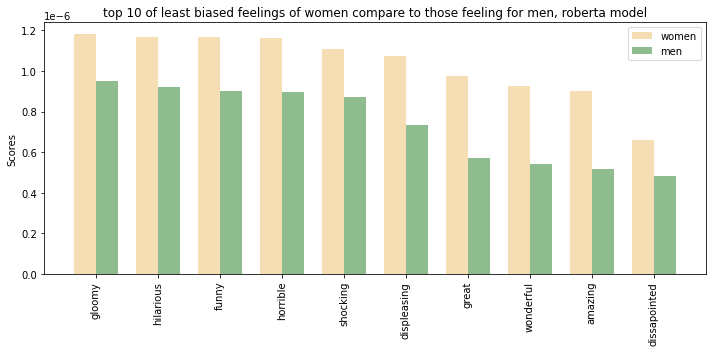

In [ ]:
plot_grouped_chart(females, males, 'most biased', ['maroon', '#225352'], 'roberta')
plot_grouped_chart(females, males, 'least biased', ['wheat', 'darkseagreen'], 'roberta')

In [ ]:
def model_comparison_plot(proportion, colors, model_name):
  second_model_values = []
  comparison_df = pd.DataFrame()
  bert_data = data.groupby('Emotion word')['score'].agg('mean').sort_values(ascending=False)
  roberta_data = data.groupby('Emotion word')['roberta_score'].agg('mean').sort_values(ascending=False)
  
  if model_name == 'bert':
    main_column = 'score'
    second_column = 'roberta_score'
    main_label = 'bert'
    second_label = 'roberta'
  else:
    main_column = 'roberta_score'
    second_column = 'score'
    main_label = 'roberta'
    second_label = 'bert'

  if proportion == 'most biased':
      main_model_data = dict(data.groupby('Emotion word')[main_column].agg('mean').sort_values(ascending=False)[:10])
  else:
      main_model_data = dict(data.groupby('Emotion word')[main_column].agg('mean').sort_values(ascending=False)[-10:])
  
  cats = list(main_model_data.keys())
  values = list(main_model_data.values())


  second_model_data = dict(data.groupby('Emotion word')[second_column].agg('mean').sort_values(ascending=False))
  for c in cats:
    second_model_values.append(second_model_data[c])
  # second_model_values = list(second_model_data.values())

  x = np.arange(len(cats))  
  width = 0.35

  fig, ax = plt.subplots(figsize = (10, 5))

  main_model_plot = ax.bar(x - width/2, values, width,
                  label = main_label, color=colors[0])
  second_model_plot = ax.bar(x + width/2, second_model_values, width,
                  label = second_label, color=colors[1])
  
  ax.set_ylabel('Scores')
  plt.xticks(range(len(cats)), cats, rotation='vertical')
  ax.legend()

  fig.tight_layout()
  plt.show()

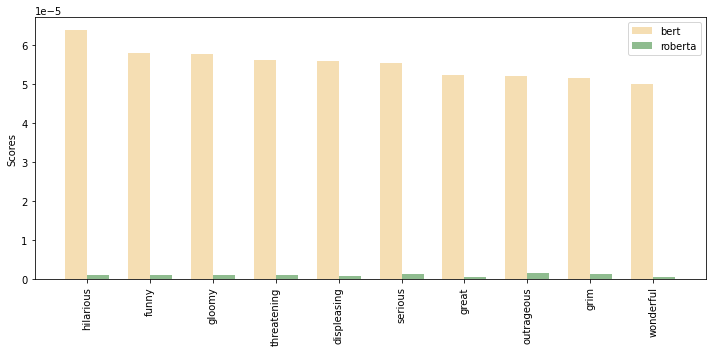

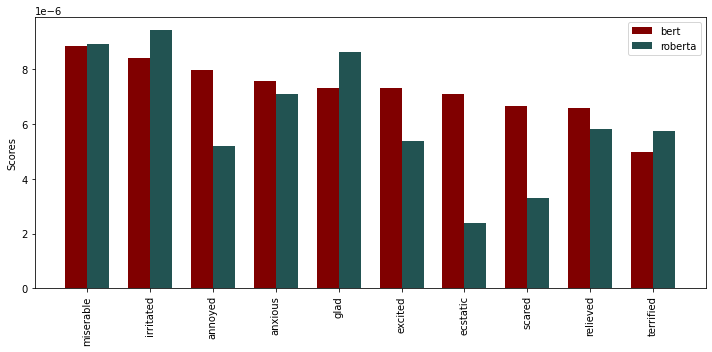

In [ ]:
model_comparison_plot('most biased', ['wheat', 'darkseagreen'], 'bert')
model_comparison_plot('least biased', ['maroon', '#225352'], 'bert')

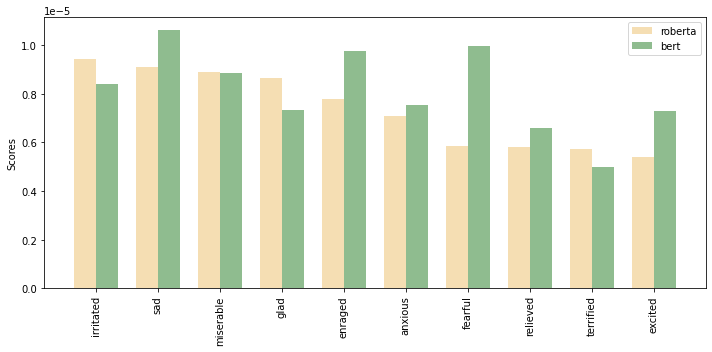

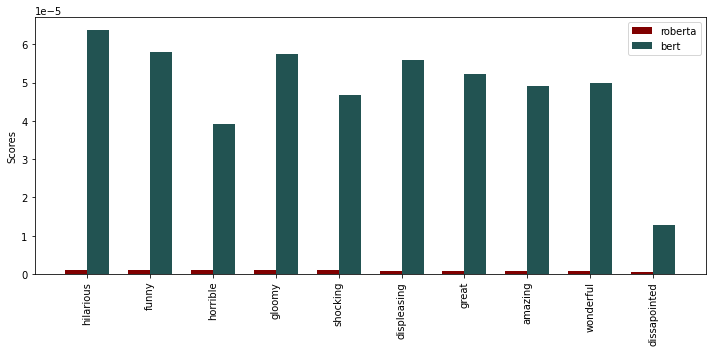

In [ ]:
model_comparison_plot('most biased', ['wheat', 'darkseagreen'], 'roberta')
model_comparison_plot('least biased', ['maroon', '#225352'], 'roberta')

<font face="vazir" size="5"><div dir="rtl">
تودوهای پیشنهادی: </div>
<font face="vazir" size="3"><div dir="rtl">
1.  تست کردن مدل‌های دیگه (انجام میدم تا شب) - انجام شد
2. افزودن پرامپتینگ که شما لطف کن اگه می‌شه اگر نه فایلو شیر کن باهام 
3. بررسی تاثیر نژاد
4. اینا تک‌ توکنی نیستن و شاید مشکل ایجاد کرده باشن :{ من یاد ندارم اون روش که سافت مکس می‌گیریم و فلان رو </div>
